In [1]:
#import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
pd.set_option('display.max_columns',None)

In C:\Users\Abhishek\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Abhishek\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Abhishek\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Abhishek\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Abhishek\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

In [2]:
#import data
data=pd.read_excel('Sales_Forecast_Data.xlsx',header=0)
data.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59


In [3]:
data.describe(include='all')

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
count,230152,230152,230152,230152,230152,230152,230152.000000
unique,4,12,5,4,142,47,NaN
top,2016-2017,Nov,Uttar Pradesh,Insecticides,Karnal,ABC Manufacturing,NaN
freq,76280,23864,122644,57538,4308,28640,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,704.973592
std,NaN,NaN,NaN,NaN,NaN,NaN,2261.623760
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,269.865000


In [4]:
# create copy of the dataframe
df=pd.DataFrame.copy(data)

In [5]:
#check shape of the dataset 
df.shape

(230152, 7)

In [6]:
# finding missing value in datasets
df.isnull().sum()

FIN_YEAR    0
MONTH       0
STATE       0
FG          0
DISTRICT    0
COMPANY     0
VALUE       0
dtype: int64

Their is no missing value in dataset 

In [7]:
#Check all unique value in dataset  
columns=df[['FIN_YEAR','STATE','DISTRICT','FG','COMPANY']]
for i in columns:
    print(columns[i].unique())
   

['2014-2015' '2015-2016' '2016-2017' '2017-2018']
['Haryana' 'Himachal Pradesh' 'Punjab' 'Uttar Pradesh' 'Uttarakhand']
['Rohtak' 'Rewari' 'Gurgaon' 'Mewat' 'Palwal' 'Jind' 'Sirsa' 'Hisar'
 'Bhiwani' 'Jhajjar' 'Mahendragarh' 'Panchkula' 'Ambala' 'Yamunanagar'
 'Kurukshetra' 'Kaithal' 'Karnal' 'Sonipat' 'Fatehabad' 'Panipat'
 'Faridabad' 'Sirmaur' 'Shimla' 'Kinnaur' 'Kangra' 'Kullu' 'Mandi'
 'Hamirpur' 'Bilaspur' 'Solan' 'Chamba' 'Lahul And Spiti' 'Una' 'Muktsar'
 'Bathinda' 'Mansa' 'Patiala' 'Amritsar' 'Tarn Taran' 'Sangrur'
 'Gurdaspur' 'Kapurthala' 'Jalandhar' 'Hoshiarpur' 'Nawanshahr'
 'Fatehgarh Sahib' 'Ludhiana' 'Moga' 'Faridkot' 'Rupnagar' 'Barnala'
 'Firozepur' 'S.A.S Nagar' 'Meerut' 'Baghpat' 'Ghaziabad' 'Maharajganj'
 'Gorakhpur' 'Fatehpur' 'Kaushambi' 'Barabanki' 'Bahraich'
 'Siddharth Nagar' 'Kushi Nagar' 'Deoria' 'Azamgarh' 'Ghazipur' 'Varanasi'
 'Mirzapur' 'Sonbhadra' 'Kanshiram Nagar' 'Saharanpur' 'Muzaffarnagar'
 'Bijnor' 'Moradabad' 'Rampur' 'Jyotiba Phule Nagar' 'Gauta

In [8]:
#Check all unique value in dataset  
columns=df[['FIN_YEAR','STATE','DISTRICT','FG','COMPANY']]
for i in columns:
    print(columns[i].nunique())

4
5
142
4
47


In [9]:
#check unique value and count for state
df['STATE'].value_counts()

Uttar Pradesh       122644
Haryana              53568
Punjab               41316
Himachal Pradesh      8092
Uttarakhand           4532
Name: STATE, dtype: int64

In [10]:
#Check all unique value count in dataset  
columns=df[['FIN_YEAR','MONTH','STATE','DISTRICT','FG','COMPANY']]
for i in columns:
    print(columns[i].value_counts())

2016-2017    76280
2015-2016    53564
2014-2015    52248
2017-2018    48060
Name: FIN_YEAR, dtype: int64
Nov    23864
Dec    22904
Oct    21840
Jan    21148
Sep    20936
Aug    20120
Jun    20088
Jul    19352
May    17716
Mar    14676
Feb    14424
Apr    13084
Name: MONTH, dtype: int64
Uttar Pradesh       122644
Haryana              53568
Punjab               41316
Himachal Pradesh      8092
Uttarakhand           4532
Name: STATE, dtype: int64
Karnal             4308
Sirsa              3656
Hisar              3604
Jind               3564
Kurukshetra        3452
                   ... 
Chamoli             152
Lahul And Spiti     144
Tehri Garhwal       132
Pathankot            44
Rudra Prayag         32
Name: DISTRICT, Length: 142, dtype: int64
Insecticides    57538
Herbicides      57538
Rodenticides    57538
Bactericides    57538
Name: FG, dtype: int64
ABC Manufacturing    28640
trita                22744
cynoid               20800
disescent            17012
interosis            14288


In [11]:
# Checking starting month and year as well as end of the data
df[['MONTH','FIN_YEAR']].min(),df[['MONTH','FIN_YEAR']].max() 

(MONTH             Apr
 FIN_YEAR    2014-2015
 dtype: object,
 MONTH             Sep
 FIN_YEAR    2017-2018
 dtype: object)

In [12]:
# sorting the data on ascending order
df1=df.sort_values(['FIN_YEAR','MONTH'],ascending=True) 
df1.head(10)

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
348,2014-2015,Apr,Haryana,Insecticides,Panchkula,cynoid,564.300
349,2014-2015,Apr,Haryana,Insecticides,Ambala,cynoid,7039.305
350,2014-2015,Apr,Haryana,Insecticides,Yamunanagar,cynoid,7385.040
351,2014-2015,Apr,Haryana,Insecticides,Kurukshetra,cynoid,0.000
352,2014-2015,Apr,Haryana,Insecticides,Kaithal,cynoid,6669.540
353,2014-2015,Apr,Haryana,Insecticides,Panipat,cynoid,5635.980
354,2014-2015,Apr,Haryana,Insecticides,Sonipat,cynoid,8605.710
355,2014-2015,Apr,Haryana,Insecticides,Jind,cynoid,6534.000
356,2014-2015,Apr,Haryana,Insecticides,Fatehabad,cynoid,13424.130
357,2014-2015,Apr,Haryana,Insecticides,Sirsa,cynoid,364.500


In [13]:
# Convert month into datetime 
from datetime import datetime


In [14]:
# create new variable on the basis of FIN_YEAR
df1['Year']=''
df1.Year=df1['FIN_YEAR'].str[0:4]

In [15]:
df1.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Year
348,2014-2015,Apr,Haryana,Insecticides,Panchkula,cynoid,564.300,2014
349,2014-2015,Apr,Haryana,Insecticides,Ambala,cynoid,7039.305,2014
350,2014-2015,Apr,Haryana,Insecticides,Yamunanagar,cynoid,7385.040,2014
351,2014-2015,Apr,Haryana,Insecticides,Kurukshetra,cynoid,0.000,2014
352,2014-2015,Apr,Haryana,Insecticides,Kaithal,cynoid,6669.540,2014


In [16]:
# create new varible on the basis of month and year
df1['Month_year']=''
df1.Month_year=df1['MONTH']+df1['Year']

In [17]:
# check new data 
df1.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Year,Month_year
348,2014-2015,Apr,Haryana,Insecticides,Panchkula,cynoid,564.300,2014,Apr2014
349,2014-2015,Apr,Haryana,Insecticides,Ambala,cynoid,7039.305,2014,Apr2014
350,2014-2015,Apr,Haryana,Insecticides,Yamunanagar,cynoid,7385.040,2014,Apr2014
351,2014-2015,Apr,Haryana,Insecticides,Kurukshetra,cynoid,0.000,2014,Apr2014
352,2014-2015,Apr,Haryana,Insecticides,Kaithal,cynoid,6669.540,2014,Apr2014


In [18]:
# convert Month_year into datetime format 
df1['Month_year']=pd.to_datetime(df1['Month_year'])

In [19]:
df1

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Year,Month_year
348,2014-2015,Apr,Haryana,Insecticides,Panchkula,cynoid,564.300,2014,2014-04-01
349,2014-2015,Apr,Haryana,Insecticides,Ambala,cynoid,7039.305,2014,2014-04-01
350,2014-2015,Apr,Haryana,Insecticides,Yamunanagar,cynoid,7385.040,2014,2014-04-01
351,2014-2015,Apr,Haryana,Insecticides,Kurukshetra,cynoid,0.000,2014,2014-04-01
352,2014-2015,Apr,Haryana,Insecticides,Kaithal,cynoid,6669.540,2014,2014-04-01
...,...,...,...,...,...,...,...,...,...
227233,2017-2018,Sep,Uttar Pradesh,Bactericides,Sonbhadra,janu,0.000,2017,2017-09-01
227234,2017-2018,Sep,Uttar Pradesh,Bactericides,Etah,janu,0.000,2017,2017-09-01
227235,2017-2018,Sep,Uttar Pradesh,Bactericides,Kanshiram Nagar,janu,0.000,2017,2017-09-01
227308,2017-2018,Sep,Himachal Pradesh,Bactericides,Shimla,ABC Manufacturing,0.000,2017,2017-09-01


In [20]:
# Convert file into excel format 
df1.to_excel('capstone Project.xlsx', index = False)

In [21]:
# grouping the data on the basis of Month_year and Value
df2=df1.groupby('Month_year')['VALUE'].sum().reset_index()
df2.head(15)

,Month_year,VALUE
0,2014-01-01,3.937522e+06
1,2014-02-01,3.101152e+06
2,2014-03-01,3.311789e+06
3,2014-04-01,1.826280e+06
4,2014-05-01,2.527515e+06
5,2014-06-01,3.116540e+06
6,2014-07-01,3.257798e+06
7,2014-08-01,3.576263e+06
8,2014-09-01,3.213171e+06
9,2014-10-01,3.626687e+06


In [22]:
# check shape of the new data
df2.shape

(46, 2)

In [23]:
# Set Month_year as a Index
df2=df2.set_index("Month_year")

In [24]:
df2.head()

,VALUE
Month_year,
2014-01-01,3.937522e+06
2014-02-01,3.101152e+06
2014-03-01,3.311789e+06
2014-04-01,1.826280e+06
2014-05-01,2.527515e+06


In [25]:
#Resample the data on Monthly basis
y=df2['VALUE'].resample('MS').mean()
y

Month_year
2014-01-01    3.937522e+06
2014-02-01    3.101152e+06
2014-03-01    3.311789e+06
2014-04-01    1.826280e+06
2014-05-01    2.527515e+06
2014-06-01    3.116540e+06
2014-07-01    3.257798e+06
2014-08-01    3.576263e+06
2014-09-01    3.213171e+06
2014-10-01    3.626687e+06
2014-11-01    4.926552e+06
2014-12-01    4.712866e+06
2015-01-01    3.119698e+06
2015-02-01    2.355526e+06
2015-03-01    4.785982e+06
2015-04-01    2.562099e+06
2015-05-01    3.361275e+06
2015-06-01    3.171509e+06
2015-07-01    3.602441e+06
2015-08-01    3.608316e+06
2015-09-01    4.218848e+06
2015-10-01    4.418285e+06
2015-11-01    4.506923e+06
2015-12-01    4.313427e+06
2016-01-01    3.362859e+06
2016-02-01    2.274134e+06
2016-03-01    3.594612e+06
2016-04-01    1.303618e+06
2016-05-01    2.537274e+06
2016-06-01    3.396644e+06
2016-07-01    2.926428e+06
2016-08-01    3.779580e+06
2016-09-01    4.060725e+06
2016-10-01    3.382497e+06
2016-11-01    4.997825e+06
2016-12-01    4.609633e+06
2017-01-01    3.1

In [26]:
# check shape
y.shape

(48,)

In [27]:
# ckeck if their is any missing value in data 
y.isnull().sum()

2

In [28]:
# fill missing values with mean value of the data 
y=y.fillna(y.mean())
y.astype('float32')

Month_year
2014-01-01    3937521.500
2014-02-01    3101152.000
2014-03-01    3311789.250
2014-04-01    1826279.625
2014-05-01    2527515.000
2014-06-01    3116539.500
2014-07-01    3257798.000
2014-08-01    3576262.750
2014-09-01    3213171.250
2014-10-01    3626686.750
2014-11-01    4926552.500
2014-12-01    4712866.500
2015-01-01    3119698.000
2015-02-01    2355526.250
2015-03-01    4785982.000
2015-04-01    2562099.500
2015-05-01    3361274.750
2015-06-01    3171508.750
2015-07-01    3602441.250
2015-08-01    3608315.500
2015-09-01    4218848.000
2015-10-01    4418285.000
2015-11-01    4506923.500
2015-12-01    4313427.000
2016-01-01    3362858.500
2016-02-01    2274133.500
2016-03-01    3594612.250
2016-04-01    1303618.500
2016-05-01    2537274.500
2016-06-01    3396644.250
2016-07-01    2926428.500
2016-08-01    3779580.250
2016-09-01    4060724.500
2016-10-01    3382496.500
2016-11-01    4997825.500
2016-12-01    4609633.500
2017-01-01    3166623.500
2017-02-01    3527197.500
2

In [29]:
# convert data into excel format 
y.to_excel(" data for Forecast2018.xlsx",index=True)

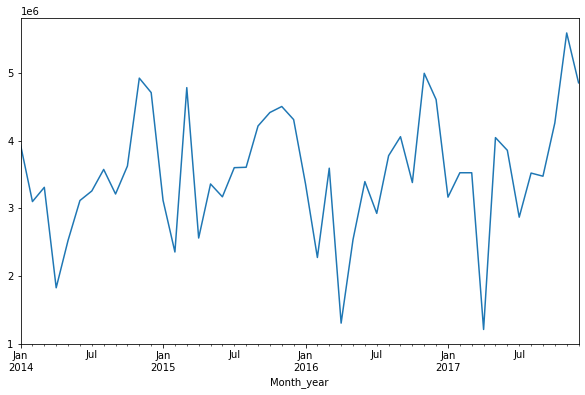

In [30]:
#Graph the plot 
y.plot(figsize=(10,6))
plt.show()

In [31]:
#Split train and test data 
train=y.loc[:'2016-12-01']
#train.tail()  

In [32]:
#Split test data 
test=y.loc['2017-01-01':]
#test.tail()

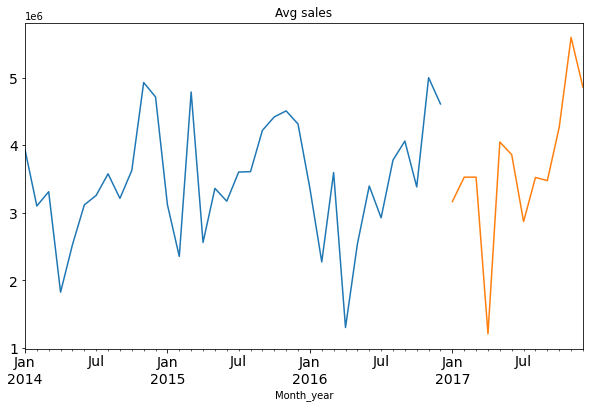

In [33]:
#Plotting the data 
train.plot(figsize=(10,6),title='Avg sales',fontsize=14)
test.plot(figsize=(10,6),title='Avg sales',fontsize=14)
plt.show()

C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


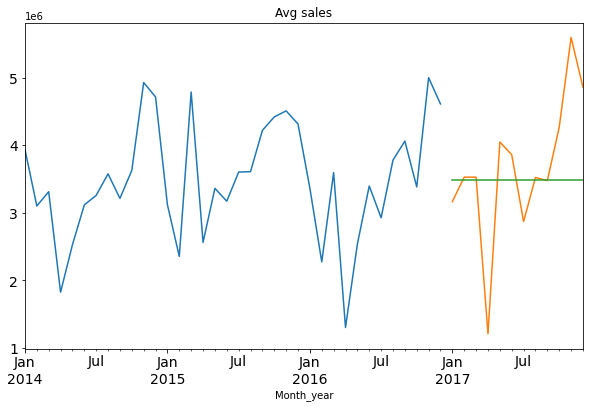

In [34]:
# Apply simple exponantial smoothing 
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_smooth=test.copy()

# Smoothing Level=alpha
#alpha value should be in the range of 0 to 1
# value close to 0 indicate that older value is less imp then recent value 
# value close to 1 indicate that older value is equally imp then recent value
fit1=SimpleExpSmoothing(train).fit(smoothing_level=0.01)
Exp_smooth['SES']=fit1.forecast(steps=len(test))

# plot the graph 
train.plot(figsize=(10,6),title='Avg sales',fontsize=14)
test.plot(figsize=(10,6),title='Avg sales',fontsize=14)
Exp_smooth['SES'].plot(figsize=(10,6),title='Avg sales',fontsize=14)
plt.savefig("simple exponantial smoothing.pdf")
plt.show() 

In [35]:
#check AIC 
# AIC is used for compare the same model with diffrent data or parameter  
fit1.aic

988.181917406821

smoothing_level=0.01 aic=988.181917406821




In [36]:
#check RMSE 
# RMSE is used to compare different model with same data or parameter 
#choose model with lower rmse value
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(test,Exp_smooth.SES))
print(rms)

1042557.9583302685


In [37]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(y,model= 'additive')
#fig= decomposition.plot()
#plt.show()

In [38]:
import statsmodels as sm
import statsmodels.api as sm
import matplotlib.pyplot as plt
decomposition = sm.tsa.seasonal_decompose(x=y, model = 'additive')
plt.rcParams.update({'figure.figsize': (5,5)})
#fig = decomposition.plot()

C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


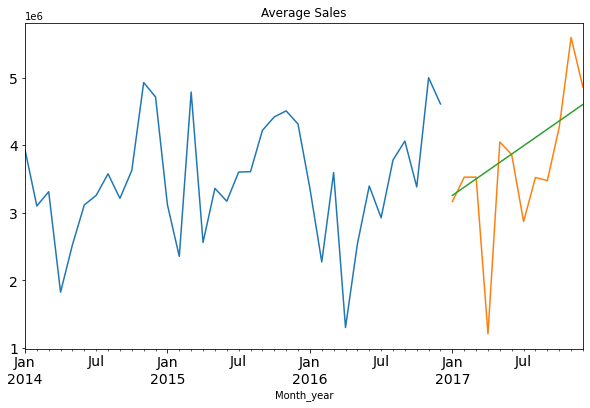

In [39]:
# bulid Holt model
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#soothing slope=beta
fit1 = Holt(train).fit(smoothing_level = 0.1,smoothing_slope = 0.5)
Holt_df['Holt_linear'] = fit1.forecast(len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.savefig("bulid Holt model.pdf")
plt.show()

In [40]:
fit1.aic

1011.4524091732663

In [41]:
# check rmse value of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_df['Holt_linear']))
print(rms)

887137.6031183947


C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


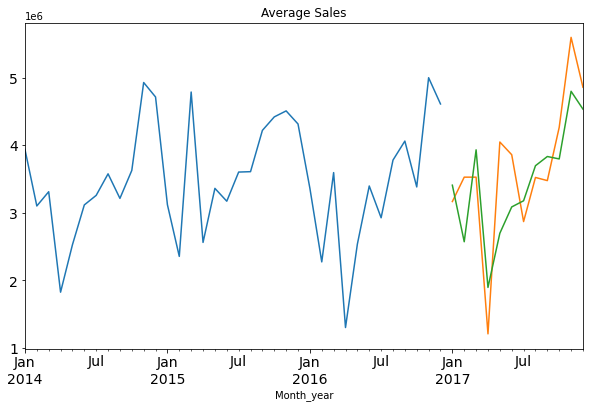

In [42]:
# bulid Holt-Winter model
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.savefig("bulid Holt-Winter model.pdf")
plt.show()

In [43]:
# check rmse of the model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print(rms)

660395.6948305807


In [44]:
fit1.aic

958.5277880430567

In [45]:
# import package for ARIMA model
import pmdarima as pm

In [56]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1061.380, Time=1.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1057.846, Time=0.61 sec


C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1054.681, Time=1.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1056.511, Time=0.06 sec


C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1056.636, Time=0.36 sec


C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1056.646, Time=0.88 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1054.941, Time=0.21 sec


C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_de

 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.86 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1058.262, Time=0.09 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1054.648, Time=0.20 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1055.233, Time=0.14 sec


C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1056.606, Time=0.39 sec


C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1056.625, Time=0.50 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1054.769, Time=0.19 sec


C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=3.40 sec


C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1057.690, Time=0.24 sec


C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1046.887, Time=0.51 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1052.733, Time=0.12 sec


C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1047.737, Time=0.59 sec


C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(2,1,1)(0,1,2)[12]             : AIC=1047.923, Time=0.94 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1047.881, Time=0.43 sec


C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(2,1,1)(1,1,2)[12]             : AIC=1049.736, Time=1.42 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=1050.832, Time=0.12 sec


C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(3,1,1)(0,1,1)[12]             : AIC=1048.808, Time=0.69 sec


C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1048.325, Time=1.15 sec


C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1047.539, Time=0.23 sec
 ARIMA(3,1,0)(0,1,1)[12]             : AIC=1052.480, Time=0.17 sec


C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(3,1,2)(0,1,1)[12]             : AIC=1049.834, Time=0.53 sec


C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(2,1,1)(0,1,1)[12] intercept   : AIC=1048.864, Time=0.46 sec

Best model:  ARIMA(2,1,1)(0,1,1)[12]          
Total fit time: 20.538 seconds


In [58]:
model.aic()

1046.8869526771198

In [60]:
# import SARIMAX from statsmodel
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1 = SARIMAX(y,
                order=(2,1,1),seasonal_order=(0,1,1,12)).fit()


C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


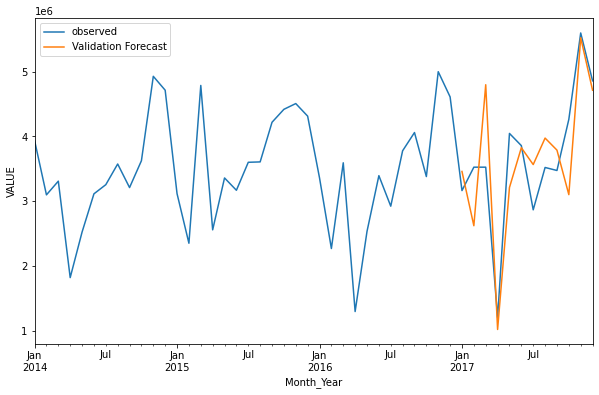

In [61]:
# perform validation forecast model on given data 
pred =model1.get_prediction(start=pd.to_datetime('2017-01-01'))
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Month_Year')
ax.set_ylabel('VALUE')
plt.legend()
plt.show()

In [62]:
# check mean of the validation forecast model
pred.predicted_mean

Month_year
2017-01-01    3.461068e+06
2017-02-01    2.625400e+06
2017-03-01    4.796863e+06
2017-04-01    1.027534e+06
2017-05-01    3.214175e+06
2017-06-01    3.827027e+06
2017-07-01    3.567326e+06
2017-08-01    3.975323e+06
2017-09-01    3.789715e+06
2017-10-01    3.104114e+06
2017-11-01    5.521106e+06
2017-12-01    4.712294e+06
Freq: MS, dtype: float64

In [63]:
# check rmse of the model
Y_pred = pred.predicted_mean
Y_test = y['2017-01-01':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)


670839.6255450038


In [64]:
model1.aic

1046.8869526771198

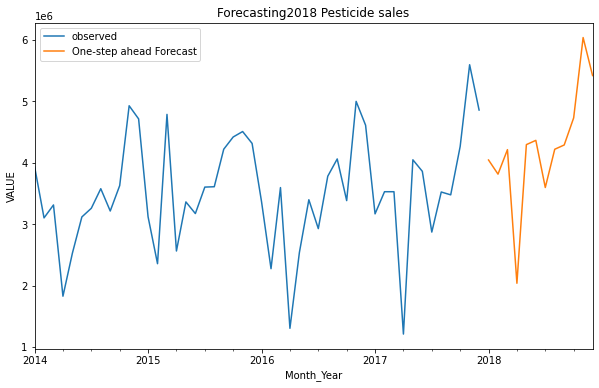

In [53]:
# Forecasting2018 pesticide sales 
pred_uc = model1.get_forecast(steps=12)
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='One-step ahead Forecast')
plt.title("Forecasting2018 Pesticide sales")
ax.set_xlabel('Month_Year')
ax.set_ylabel('VALUE')
plt.legend()
plt.savefig("Forecasting2018 Pesticide sales.pdf")
plt.show()

In [54]:
# check forecast2018 data 
Y_predictions=pred_uc.predicted_mean
Y_predictions

2018-01-01    4.043728e+06
2018-02-01    3.813554e+06
2018-03-01    4.212346e+06
2018-04-01    2.037082e+06
2018-05-01    4.293941e+06
2018-06-01    4.363136e+06
2018-07-01    3.595912e+06
2018-08-01    4.218621e+06
2018-09-01    4.288034e+06
2018-10-01    4.729301e+06
2018-11-01    6.036845e+06
2018-12-01    5.418233e+06
Freq: MS, dtype: float64

In [55]:
# convert data into excel format 
Y_predictions.to_excel("Forecast2018.xlsx",index=True)

In [56]:
# saving the model to the local file system
import pickle
filename = 'pesticide sales Forecast.pickle'
pickle.dump(model1, open(filename, 'wb'))

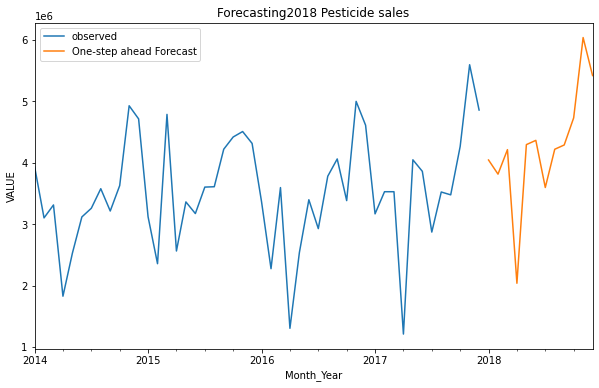

In [57]:
# Forecasting2018 pesticide sales 
test_model = model1.get_forecast(steps=24)
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='One-step ahead Forecast')
plt.title("Forecasting2018 Pesticide sales")
ax.set_xlabel('Month_Year')
ax.set_ylabel('VALUE')
plt.legend()
plt.savefig("Forecasting2018 Pesticide sales.pdf")
plt.show()

# Conduct state wise trend analysis of the given sales

In [58]:
# copy data
state=df1.copy()

In [59]:
state.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Year,Month_year
348,2014-2015,Apr,Haryana,Insecticides,Panchkula,cynoid,564.300,2014,2014-04-01
349,2014-2015,Apr,Haryana,Insecticides,Ambala,cynoid,7039.305,2014,2014-04-01
350,2014-2015,Apr,Haryana,Insecticides,Yamunanagar,cynoid,7385.040,2014,2014-04-01
351,2014-2015,Apr,Haryana,Insecticides,Kurukshetra,cynoid,0.000,2014,2014-04-01
352,2014-2015,Apr,Haryana,Insecticides,Kaithal,cynoid,6669.540,2014,2014-04-01


In [60]:
state["STATE"].value_counts()

Uttar Pradesh       122644
Haryana              53568
Punjab               41316
Himachal Pradesh      8092
Uttarakhand           4532
Name: STATE, dtype: int64

In [61]:
state=state[['Month_year','STATE','VALUE']]
state.head()

,Month_year,STATE,VALUE
348,2014-04-01,Haryana,564.300
349,2014-04-01,Haryana,7039.305
350,2014-04-01,Haryana,7385.040
351,2014-04-01,Haryana,0.000
352,2014-04-01,Haryana,6669.540


# STATE=HARYANA

In [62]:
#create new dataframe on the basis of Haryana state and value
haryana = state.loc[state['STATE'] == 'Haryana']

In [63]:
haryana.head()

,Month_year,STATE,VALUE
348,2014-04-01,Haryana,564.300
349,2014-04-01,Haryana,7039.305
350,2014-04-01,Haryana,7385.040
351,2014-04-01,Haryana,0.000
352,2014-04-01,Haryana,6669.540


In [64]:
haryana=haryana.groupby('Month_year')['VALUE'].sum().reset_index()
haryana.head()

,Month_year,VALUE
0,2014-01-01,723076.335
1,2014-02-01,457637.175
2,2014-03-01,340099.830
3,2014-04-01,213921.270
4,2014-05-01,412634.115


In [65]:
# Set Month_year as a Index
haryana=haryana.set_index("Month_year")

In [66]:
#Resample the data on Monthly basis
y=haryana['VALUE'].resample('MS').mean()
#y

In [67]:
y=y.fillna(y.mean())
#y

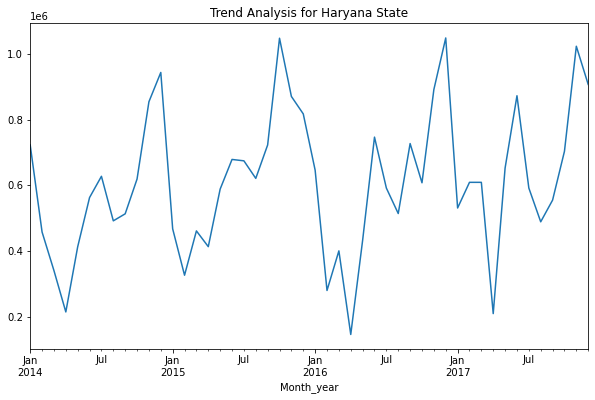

In [68]:
#Graph the plot 
y.plot(figsize=(10,6))
plt.title("Trend Analysis for Haryana State")
plt.savefig("Trend Analysis for Haryana State.pdf")
plt.show()

# STATE=UTTAR PRADESH

In [69]:
# create new dataframe on the basis of Uttar Pradesh
up = state.loc[state['STATE'] == 'Uttar Pradesh']
up.shape

(122644, 3)

In [70]:
up=up.groupby('Month_year')['VALUE'].sum().reset_index()
up.head()

,Month_year,VALUE
0,2014-01-01,2.343644e+06
1,2014-02-01,1.877097e+06
2,2014-03-01,2.395011e+06
3,2014-04-01,7.756594e+05
4,2014-05-01,1.287090e+06


In [71]:
# Set Month_year as a Index
up=up.set_index("Month_year")

In [72]:
#Resample the data on Monthly basis
y=up['VALUE'].resample('MS').mean()
y

Month_year
2014-01-01    2.343644e+06
2014-02-01    1.877097e+06
2014-03-01    2.395011e+06
2014-04-01    7.756594e+05
2014-05-01    1.287090e+06
2014-06-01    1.448486e+06
2014-07-01    1.764072e+06
2014-08-01    2.254021e+06
2014-09-01    1.925052e+06
2014-10-01    1.975757e+06
2014-11-01    2.925865e+06
2014-12-01    2.590510e+06
2015-01-01    1.872961e+06
2015-02-01    1.283992e+06
2015-03-01    3.314801e+06
2015-04-01    1.082186e+06
2015-05-01    1.623407e+06
2015-06-01    1.604634e+06
2015-07-01    2.009204e+06
2015-08-01    2.001198e+06
2015-09-01    2.220735e+06
2015-10-01    1.972842e+06
2015-11-01    2.555516e+06
2015-12-01    2.501667e+06
2016-01-01    2.136016e+06
2016-02-01    1.419104e+06
2016-03-01    2.381239e+06
2016-04-01    6.785787e+05
2016-05-01    1.367219e+06
2016-06-01    1.532681e+06
2016-07-01    1.478979e+06
2016-08-01    2.105689e+06
2016-09-01    2.244851e+06
2016-10-01    1.808780e+06
2016-11-01    2.782726e+06
2016-12-01    2.442273e+06
2017-01-01    2.0

In [73]:
y=y.fillna(y.mean())
#y

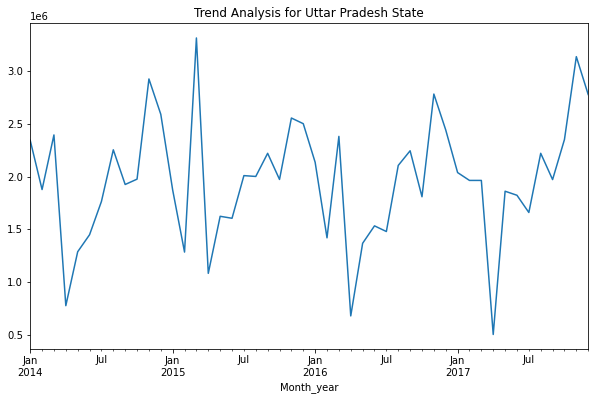

In [74]:
#Graph the plot 
y.plot(figsize=(10,6))
plt.title("Trend Analysis for Uttar Pradesh State")
plt.savefig("Trend Analysis for Utter Pradesh.pdf")
plt.show()

# STATE=Punjab  

In [75]:
# create new dataframe on the basis of punjab state
punjab= state.loc[state['STATE'] == 'Punjab']
punjab.shape

(41316, 3)

In [76]:
# grouping the data on the basis of Month_year and VALUE
punjab=punjab.groupby('Month_year')['VALUE'].sum().reset_index()

In [77]:
# Set Month_year as a Index
punjab=punjab.set_index("Month_year")

In [78]:
#Resample the data on Monthly basis
y=punjab['VALUE'].resample('MS').mean()
#y

In [79]:
# fill the missing values with mean values of the data
y=y.fillna(y.mean())
#y

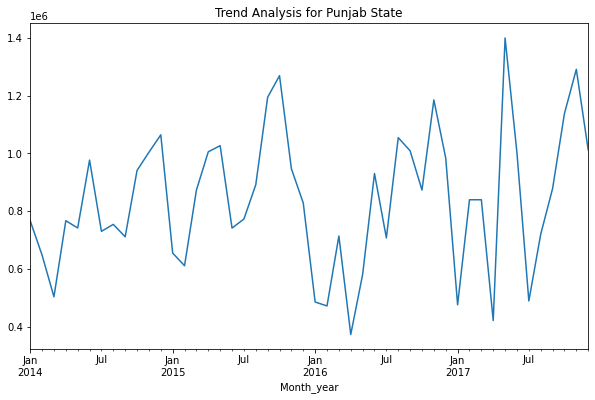

In [80]:
#Graph the plot 
y.plot(figsize=(10,6))
plt.title("Trend Analysis for Punjab State")
plt.savefig("Trend Analysis for Punjab State.pdf")
plt.show()

# State=Himachal Pradesh 

In [81]:
# create new dataframe on the basis of Himachal Pradesh 
hp= state.loc[state['STATE'] == 'Himachal Pradesh']
hp.shape

(8092, 3)

In [82]:
# grouping the data on the basis of month_years and Values
hp=hp.groupby('Month_year')['VALUE'].sum().reset_index()
hp

,Month_year,VALUE
0,2014-01-01,39021.885
1,2014-02-01,23974.110
2,2014-03-01,5040.630
3,2014-04-01,14058.900
4,2014-05-01,17053.200
5,2014-06-01,25221.510
6,2014-07-01,35267.670
7,2014-08-01,7495.875
8,2014-09-01,165.375
9,2014-10-01,13826.835


In [83]:
# Set Month_year as a Index
hp=hp.set_index("Month_year")

In [84]:
#Resample the data on Monthly basis
y=hp['VALUE'].resample('MS').mean()


In [85]:
# fill the missing values with mean values
y=y.fillna(y.mean())
y

Month_year
2014-01-01    39021.885000
2014-02-01    23974.110000
2014-03-01     5040.630000
2014-04-01    14058.900000
2014-05-01    17053.200000
2014-06-01    25221.510000
2014-07-01    35267.670000
2014-08-01     7495.875000
2014-09-01      165.375000
2014-10-01    13826.835000
2014-11-01    42819.300000
2014-12-01    41332.410000
2015-01-01    27659.475000
2015-02-01    19223.865000
2015-03-01    31303.800000
2015-04-01    16622.820000
2015-05-01    18659.700000
2015-06-01    28814.130000
2015-07-01    36469.575000
2015-08-01    21183.390000
2015-09-01    21084.705000
2015-10-01    32621.805000
2015-11-01    19710.405000
2015-12-01    43592.580000
2016-01-01    19237.230000
2016-02-01    48452.175000
2016-03-01    33551.820000
2016-04-01     1407.780000
2016-05-01    22886.280000
2016-06-01    28411.290000
2016-07-01    32565.915000
2016-08-01    11781.450000
2016-09-01    28102.950000
2016-10-01    24027.300000
2016-11-01    27566.190000
2016-12-01    13604.220000
2017-01-01    318

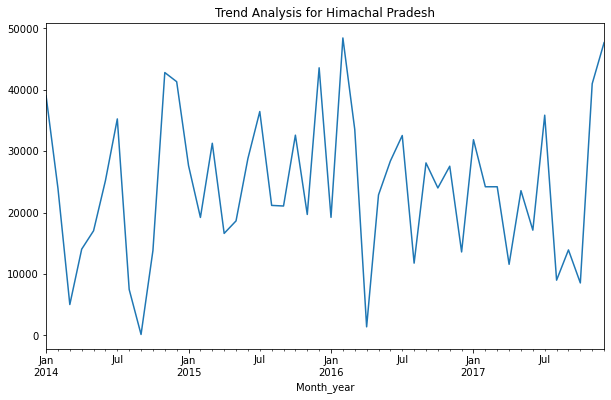

In [86]:
#Graph the plot 
y.plot(figsize=(10,6))
plt.title("Trend Analysis for Himachal Pradesh")
plt.savefig("Trend Analysis for Himachal Pradesh.pdf")
plt.show()

# State=Uttarakhand   

In [87]:
# create new data on the basis of Uttarakhand state
uk= state.loc[state['STATE'] == 'Uttarakhand']
uk.head()

,Month_year,STATE,VALUE
7725,2014-04-01,Uttarakhand,14.445
7726,2014-04-01,Uttarakhand,156.600
7727,2014-04-01,Uttarakhand,24.300
7728,2014-04-01,Uttarakhand,189.000
7729,2014-04-01,Uttarakhand,224.100


In [88]:
#grouping the data 
uk=uk.groupby('Month_year')['VALUE'].sum().reset_index()
uk

,Month_year,VALUE
0,2014-01-01,64954.0350
1,2014-02-01,94264.4250
2,2014-03-01,67716.0000
3,2014-04-01,55295.7300
4,2014-05-01,68594.8500
5,2014-06-01,102949.3800
6,2014-07-01,100295.5500
7,2014-08-01,68361.9750
8,2014-09-01,63160.2900
9,2014-10-01,76685.4000


In [89]:
# Set Month_year as a Index
uk=uk.set_index("Month_year")
#uk

In [90]:
#Resample the data on Monthly basis
y=uk['VALUE'].resample('MS').mean()
y

Month_year
2014-01-01     64954.0350
2014-02-01     94264.4250
2014-03-01     67716.0000
2014-04-01     55295.7300
2014-05-01     68594.8500
2014-06-01    102949.3800
2014-07-01    100295.5500
2014-08-01     68361.9750
2014-09-01     63160.2900
2014-10-01     76685.4000
2014-11-01     98586.0450
2014-12-01     72161.0100
2015-01-01     96423.6150
2015-02-01    114954.6600
2015-03-01    105656.9805
2015-04-01     44436.4650
2015-05-01    103579.1550
2015-06-01    117258.8400
2015-07-01    108990.0900
2015-08-01     72897.5700
2015-09-01     59193.1800
2015-10-01     94766.5170
2015-11-01    113434.2900
2015-12-01    121737.6000
2016-01-01     75398.1750
2016-02-01     54955.8000
2016-03-01     65247.6600
2016-04-01    104904.3150
2016-05-01    133894.0800
2016-06-01    157839.2325
2016-07-01    115405.1550
2016-08-01     93273.6600
2016-09-01     51050.9250
2016-10-01     68383.0350
2016-11-01    109880.0100
2016-12-01    120071.4300
2017-01-01     89631.9000
2017-02-01            NaN
2

In [91]:
# fill the missing values with mean values
y=y.fillna(y.mean())
#y

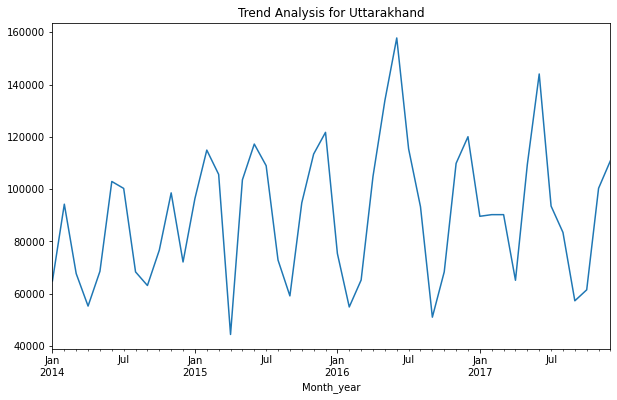

In [92]:
#Graph the plot 
y.plot(figsize=(10,6))
plt.title("Trend Analysis for Uttarakhand")
plt.savefig("Trend Analysis for Uttarakhand.pdf")
plt.show()

In [93]:
# saving the model to the local file system
import pickle
filename = 'pesticide sales Forecast.pickle'
pickle.dump(model, open(filename, 'wb'))

In [94]:
df=pd.read_pickle('pesticide sales Forecast.pickle')

In [95]:
# Forecasting2018 pesticide sales 
ab = model.get_forecast(steps=5)
plt.figure(figsize=(10,6))
sa= y['2014':].plot(label='observed')
pred_uc.predicted_mean.plot(ax=sa, label='One-step ahead Forecast')
plt.title("Forecasting2018 Pesticide sales")
ax.set_xlabel('Month_Year')
ax.set_ylabel('VALUE')
plt.legend()
plt.savefig("Forecasting Pesticide sales.pdf")
plt.show()

AttributeError: 'ARIMA' object has no attribute 'get_forecast'

In [ ]:
# save model into pickle format
#import pickle
#with open('pesticide sales Forecast.pickle.sav','wb')as f:
#pickle.dump(model,f)

In [ ]:
# saving the model to the local file system
import pickle
filename = 'pesticide sales Forecast.pickle'
pickle.dump(model, open(filename, 'wb'))